# Predicting Spam Emails 

**Group Members: Xinyi Wang, Emma Wolfe, Elena Leung, Qiyu Luo**

**Course: STAT_V 301 102 2024W2 Statistical Modelling for Data Science**

**Date: Tuesday, April 8th 2025**

# Introduction 

## Background Information 

Something that anyone with an email has encountered are spam emails. These can range from nonsensical emails (telling you that you can get free spins at some casino), supposedly innocuous emails (informing you that your package has mysteriously gone missing) or something concerning (a doctor informing you that an emergency has occurred). These emails aim to convince the receiver to click on some suspicious link that will forcefully download a virus or even steal information (*Malicious Spam Emails Developments and Authorship Attribution*, 2013). As a result, for security purposes, there is a focus on preventing a user from interacting with spam. In fact, some researchers have dedicated complicated algorithms that are tailored to detecting a specific type of spam email (Soni, 2019). This goes to show that spam emails are dangerous and can be difficult to identify. 

## Question we are adressing: 

We want to examine the association between spam emails (response) and predictors that describe the email content (count or presence of certain words) and general information about the email (count of attachments, subject content, character count). For specific variables used in the model refer to the following list: 

- `spam`: target variable
- `to_multiple`: indicates if the email was sent to more than one recipient (dbl -binary)
- `from`: if message was listed from someone (dbl - binary)
- `cc`: number of people who were cc'd (dbl - positive integer)
- `sent_email`: indicates if the sender had been sent an email in the last 30 days (dbl - binary)
- `image`: number of images attached (dbl - positive integer)
- `attach`: number of attached files (dbl - positive integer)
- `dollar`: number of times a dollar sign or the word dollar appears in the email (dbl - positive integer)
- `winner`: indicates if the word "winner" apears in the email (chr - binary but as "yes" or "no")
- `inherit`: number of times the word inherit (or others like inheritance) appear in the email (dbl - positive integer)
- `viagra`: the number of times viagra appears in the email (dbl - positive integer)
- `password`: the number of times password appears in the email (dbl - positive integer)
- `num_char`: the number of characters in the email (dbl - in thousands)
- `line_breaks`: the number of line breaks in the email (does not count text wrapping)
- `format`: indicates whether the email was written using HTML (may have bold letters or links)
- `re_subj`: the subjects starts with “Re:”, “RE:”, “re:”, or “rE:”
- `exclaim_subj`: indicates if there is an exclamation point in the subject
- `urgent_subj`: indicates if the word urgent is in the email subject
- `exclaim_mess`: the number of exclamation points in the email message (double
- `number`: indicates if there was no number, a small number (under 1 million), or a big number (more than 1 million) (character - text)


# Methods and Results

## a) Data

In [1]:
#import statements 
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(patchwork)
library(boot)
library(caret)
library(pROC)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:boot’:

    melanoma



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [3]:
# read and load the dataset into R from the data folder 
data_link = "https://www.openintro.org/data/csv/email.csv"
email_data <- read_csv(data_link, show_col_types = FALSE)
head(email_data)

spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,⋯,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,⋯,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,⋯,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,⋯,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,⋯,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,⋯,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,⋯,0,2,1.091,25,0,0,0,0,1,none


**Citation for data:** Diez, D. (2012). *email* \[Dataset]. OpenIntro. https://www.openintro.org/data/index.php?data=email


**Observational or Experimental data:** Observational data since it is just data collected from a single inbox of an individual user. There was no manipulation of variables to study cause and effect. 


**Description of variables:**

| Variable Name | Type| Description|
| :--------------| :----:| :------------|
|spam | Categorical | An indicator of whether the email is spam or not. |
|to_multiple| Categorical| An indicator for whether the email was addressed to more than one person.|
|from | Categorical| An indicator for whether the email was listed as from anyone.|
|cc | Numerical | How many people were included in the CC list. |
|sent_email| Categorical| An indicator for whether the sender had been contacted via email in the last 30 days.|
|time| String| When the email was sent.|
|image| Numerical | The number of images attached.|
|attach|Numerical| The number of attachments included.|
|dollar| Numerical| The number of times the word ``dollar`` was used or ``$`` appeared. |
|winner| Categorical| Whether or not the word ``winner`` appeared in the email.|
|inherit| Numerical| The number of times the word ``inherit`` appeared.|
|viagra| Numerical| The number of times the word ``viagra`` appeared.|
|password| Numerical| The number of times the word ``password`` appeared.|
|num_char| Numerical | The number of characters in the emails (by the thousands).|
|line_breaks| Numerical| The number of line breaks excluding text wrapping.| 
|format| Categorical| An indicator for whether the email was written using HTML.|
|re_subj| Categorical| Whether the subject line lead with some variation of ``RE:`` (in all variations of casing).|
|exclaim_subj| Categorical| Whether the subject line contains `!`.|
|urgent_subj| Categorical| Whether the subject line contains `urgent`.|
|exclaim_mess| Numerical |The number of `!` contained in email body.|
|number| Categorical| An indicator for whether no numbers appeared, a number < $10^7$ appeared, or a large number $\ge 10^7$ appeared.|


## Exploratory Data Analysis (EDA)

In [4]:
# Transforming data: factoring the data for tidying
# Main developer: Elena
# Contributors: 
email_tidy <- email_data |>
                mutate(
                    spam = as.factor(spam),
                    to_multiple = as.factor(to_multiple),
                    from = as.factor(from),
                    sent_email = as.factor(sent_email),
                    winner = as.factor(winner),
                    format = as.factor(format),
                    re_subj = as.factor(re_subj),
                    exclaim_subj = as.factor(exclaim_subj),
                    number = as.factor(number)
                )

head(email_tidy)

spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,⋯,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<fct>,<fct>,<fct>,<dbl>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,⋯,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,⋯,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,⋯,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,⋯,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,⋯,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,⋯,0,2,1.091,25,0,0,0,0,1,none


In [5]:
# Checking if there is any NaN/missing values 
# FALSE if there are no NaN values 
# TRUE if there are missing values 
any(is.na(email_tidy))

[1] FALSE

In [6]:
# Checking class imbalance 
email_tidy %>% count(spam)

spam,n
<fct>,<int>
0,3554
1,367


In [7]:
# Checking counts of from variable to determine if it is useable 
email_data %>% count(from)

from,n
<dbl>,<int>
0,3
1,3918


We have decided to drop this variable because of the large class imbalance it will likely not positively contribute to the model. 

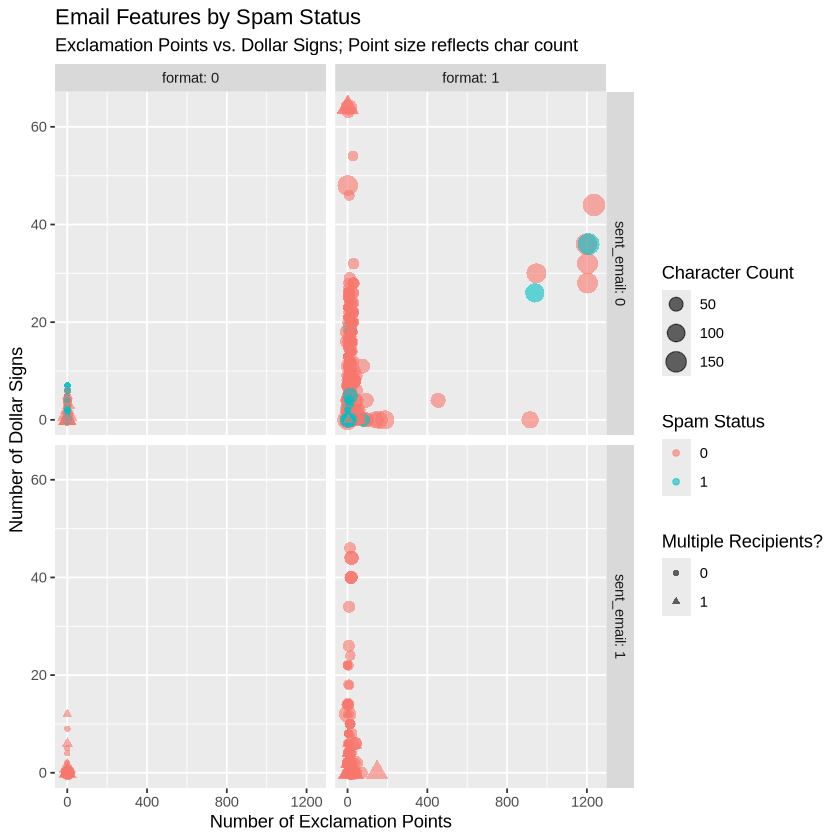

In [9]:
# Plot for EDA
# Main developer: Qiyu
# Contributors: 

ggplot(email_tidy, aes(
  x = exclaim_mess,
  y = dollar,
  color = spam,
  shape = to_multiple,
  size  = num_char
)) +
  geom_point(alpha = 0.6) +
  facet_grid(sent_email ~ format, labeller = label_both) +
  labs(
    title    = "Email Features by Spam Status",
    subtitle = "Exclamation Points vs. Dollar Signs; Point size reflects char count",
    x        = "Number of Exclamation Points",
    y        = "Number of Dollar Signs",
    color    = "Spam Status",
    shape    = "Multiple Recipients?",
    size     = "Character Count"
  )

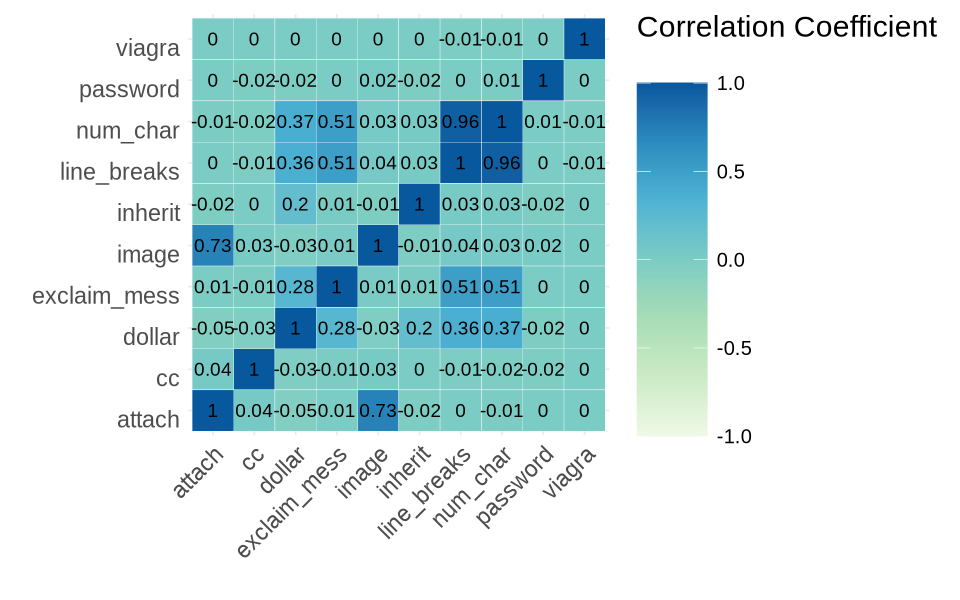

In [8]:
# correlation heatmap for numerical variables
# Main Developer: Elena
options(repr.plot.width = 8, repr.plot.height = 5) 
corr_matrix <- 
    email_tidy |>
    select(cc, image, attach, dollar, 
           inherit, viagra, password, num_char, 
           line_breaks, exclaim_mess) |>
    cor() |>
    as_tibble(rownames = 'var1') |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
corr_matrix |>
ggplot(aes(x = var1, y = var2)) +
geom_tile(aes(fill = corr), color = "white") +
scale_fill_distiller("Correlation Coefficient \n",
                        palette = "GnBu",
                         direction = 1,
                     limits = c(-1,1)
                     ) +
labs(x = "", y = "") +
theme_minimal() +
 theme(
         axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
         axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
         legend.title = element_text(size = 18),
         legend.text = element_text(size = 12),
         legend.key.size = unit(1.5, "cm")
     ) +
     coord_fixed() +
  geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 4)

## Methods: Plan

Proposed Method to address question: **Logistic Regression**

This method can be used to address the above question since the target is binary. Some of the variables of interest have been included in the question above to increase specificity and proper variable selection will be conducted in the final stage of this project. We are assuming the outcome is binary, that an email is either a regular email or a spam email, an email cannot be both a regular email and a spam. We are also assuming our sample is sufficient. While we are only using one user's inbox for this model, we can narrow our focus and question to be answered using just this one set of data. The model may perform poorly on other mailboxes. We are also assuming the relationship between the predictor variables and the log-odds of the target variable is linear when it is possible that is not the case. This is a potential limitation of the model since we might be trying to find a linear relationship where there isn't any or it is not as strong as another relationship. Logistic regression also may struggle with the class imbalance. We have an acceptable amount of spam emails to use but there is still an imbalance. It is possible this issue will not arise but it is something to keep in mind.

In [9]:
# removing certain variables and splitting into training and testing data 
# Main developer: Emma
# Contributors: Elena
set.seed(123)

email_filtered <- email_data |>
    #dropping from due to class imbalance, 
    #time due to this not being a temporal analysis
    #and line_breaks due to high correlation with num_char
    select(-from, -line_breaks, -time) 

email_train  = email_filtered %>%
  sample_frac(0.6)

email_test = email_filtered %>%
  setdiff(email_train)

head(email_train)
head(email_test)

spam,to_multiple,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,0,0,0,0,0,no,0,0,0,7.979,1,0,1,0,8,small
1,0,0,0,0,0,0,no,0,0,0,0.496,1,0,0,0,0,none
0,0,6,1,1,1,0,no,0,0,0,30.279,1,1,0,0,31,big
0,1,0,0,0,1,2,no,0,0,0,0.824,0,0,0,0,4,small
0,0,0,1,0,0,0,no,0,0,0,2.174,1,1,0,0,2,small
0,0,0,0,0,0,1,no,0,0,0,2.065,1,0,0,0,0,small


spam,to_multiple,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0,0,0,0,0,4,no,1,0,0,7.773,1,0,0,0,6,small
0,1,0,1,0,0,0,no,0,0,0,4.837,1,0,0,0,1,big
0,0,1,0,0,0,0,no,0,0,0,4.020,0,1,0,0,1,small
0,0,1,1,0,0,0,no,0,0,0,15.075,1,1,0,0,10,small
0,0,2,0,0,0,2,no,0,0,0,19.693,1,1,0,0,4,big
0,0,0,0,2,2,9,no,0,0,0,11.453,1,0,0,0,4,big


### Feature Selection

In this project, a **backward selection** approach was used to identify the most relevant predictors. Below is an overview of the key steps and the rationale behind them:

1. **Comprehensive Starting Model**  
We began with a near-complete model, **excluding**:

- **`from`** (due to class imbalance, as it was almost always 1),
- **`time`** (because our analysis was not temporal), and
- **`line_breaks`** (highly correlated with `num_char`, making it redundant).

From there, we applied **backward selection**, dropping any remaining variables that failed to improve our model’s predictive performance. 

2. **Iterative Removal (Backward Selection)**  
   - At each iteration, the variable contributing least to model performance (based on a chosen metric such as p-values, AIC/BIC, or adjusted \(R^2\)) was dropped.  
   - This process continued until no further improvement in model fit or interpretability could be achieved by removing more variables.

3. **Why These Covariates?**  
   - **Statistical Significance**: Only variables that consistently improved predictive accuracy or were statistically relevant remained.  
   - **Multicollinearity Considerations**: Highly correlated features were carefully evaluated to avoid redundancy.  
   - **Practical Relevance**: Variables that offered minimal practical insight or had near-zero variation (e.g., a highly imbalanced factor) were excluded.

4. **Forward or Backward?**  
   - **Forward Selection** starts with no variables and adds them one by one.  
   - **Backward Selection** starts with all variables and removes the least helpful.  
   - We chose **backward selection** for efficiency (given a moderate set of predictors) and a lower risk of missing useful variables right from the start.

5. **Outcome**  
   - The final subset of covariates maximized model performance while maintaining interpretability. This parsimony also aids in generalizing to new data.

By systematically removing underperforming features, the final model retained only those predictors most strongly tied to the outcome, providing a clear and concise basis for further analysis and future improvements.

In [11]:
#Performing backwards variable selection
# Main developer: Elena
# Contributors:
set.seed(123)
email_backward_sel <- regsubsets(
        x = spam ~ .,
        nvmax = 18,
        data = email_train,
        method = "backward")
sel_summary <- summary(email_backward_sel)
sel_summary$which
        

,(Intercept),to_multiple,cc,sent_email,image,attach,dollar,winneryes,inherit,viagra,password,num_char,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,numbernone,numbersmall
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
3,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
4,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
5,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
6,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
7,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
8,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
9,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE
10,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE


In [12]:
# determining which model is the best generative model
# Main developer: Elena
# Contributors: 
email_summary_df <- 
    tibble(
        n_input_vars = 1:18,
        RSQ = sel_summary$rsq,
        RSS = sel_summary$rss,
        ADJ.R2 = sel_summary$adjr2
        )
email_summary_df

n_input_vars,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.07265143,184.1873,0.07225698
2,0.11295419,176.1825,0.11219926
3,0.13173345,172.4526,0.13062456
4,0.14345079,170.1253,0.14199159
5,0.15859546,167.1173,0.15680295
6,0.16748612,165.3515,0.16535692
7,0.17573813,163.7125,0.17327764
8,0.17967071,162.9314,0.17687095
9,0.18309656,162.2510,0.17995865


In [13]:
# creating the logistic regression model 
# Main developer: Emma
# Contributors: 
log_email_model <-
    #dropping variables based on adjr^2 in selection
    glm(formula = spam ~ . - inherit - exclaim_subj, 
        data = email_train, family = binomial)

summary(log_email_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = spam ~ . - inherit - exclaim_subj, family = binomial, 
    data = email_train)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.48499    0.27185  -1.784  0.07442 .  
to_multiple    -2.41669    0.41594  -5.810 6.24e-09 ***
cc              0.02819    0.03280   0.859  0.39012    
sent_email    -29.96927 1102.91102  -0.027  0.97832    
image          -1.47860    0.89857  -1.646  0.09987 .  
attach          0.56382    0.19695   2.863  0.00420 ** 
dollar         -0.08241    0.04681  -1.760  0.07833 .  
winneryes       2.73803    0.56372   4.857 1.19e-06 ***
viagra          2.94132 3654.05478   0.001  0.99936    
password       -1.07152    0.47243  -2.268  0.02332 *  
num_char       -0.06525    0.01419  -4.597 4.29e-06 ***
format         -0.57155    0.19109  -2.991  0.00278 ** 
re_subj        -1.65175    0.50514  -3.270  0.00108 ** 
urgent_subj    18.58483  779.72879   0.024  0.98098    
exclaim_mess   -0.01685    0.02068  -0.815  0

In [14]:
# Calculating the missclassification rate 
# Main developer: Emma
# Contributors: 

# Missclassification function 
misclassification_rate <- function(y, p.hat){
     y_hat <- round(p.hat, 0)
     error_rate <- mean(abs(y - y_hat))
     return(error_rate)
}

# Error rate using the training data
error_rate_train <- 
     misclassification_rate(
         email_train$spam, 
         predict(log_email_model, type = "response"))
error_rate_train

[1] 0.08287293

In [15]:
# out of sample error rate using cross-validation (training data)
# Main developer: Emma
# Contributors: 
set.seed(123)

# 10-fold cross-validation 
cv_logistic <- 
     cv.glm(
         glmfit = log_email_model, 
         data = email_train, 
         K = 10, 
         cost = misclassification_rate)

cv_logistic$delta[1]

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numeri

[1] 0.08967276

In [16]:
#Prediction performance using test set 
# Main developer: Emma
# Contributors: 

#obtain predicted classes
email_predicted_class <- 
    round(predict(log_email_model, 
                       newdata = email_test, 
                       type = "response"), 0)

head(email_predicted_class, 10)

1  2  3  4  5  6  7  8  9 10 
 0  0  0  0  0  0  0  0  0  0

In [17]:
# Confusion matrix for test data
# Main developer: Emma
# Contributors: 
email_confusion_matrix <- 
    confusionMatrix(
        data = as.factor(email_predicted_class),
        reference = as.factor(email_test$spam),
        positive = "1"
        )
email_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1358  113
         1   13   12
                                          
               Accuracy : 0.9158          
                 95% CI : (0.9005, 0.9294)
    No Information Rate : 0.9164          
    P-Value [Acc > NIR] : 0.5607          
                                          
                  Kappa : 0.1359          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.096000        
            Specificity : 0.990518        
         Pos Pred Value : 0.480000        
         Neg Pred Value : 0.923182        
             Prevalence : 0.083556        
         Detection Rate : 0.008021        
   Detection Prevalence : 0.016711        
      Balanced Accuracy : 0.543259        
                                          
       'Positive' Class : 1               
                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



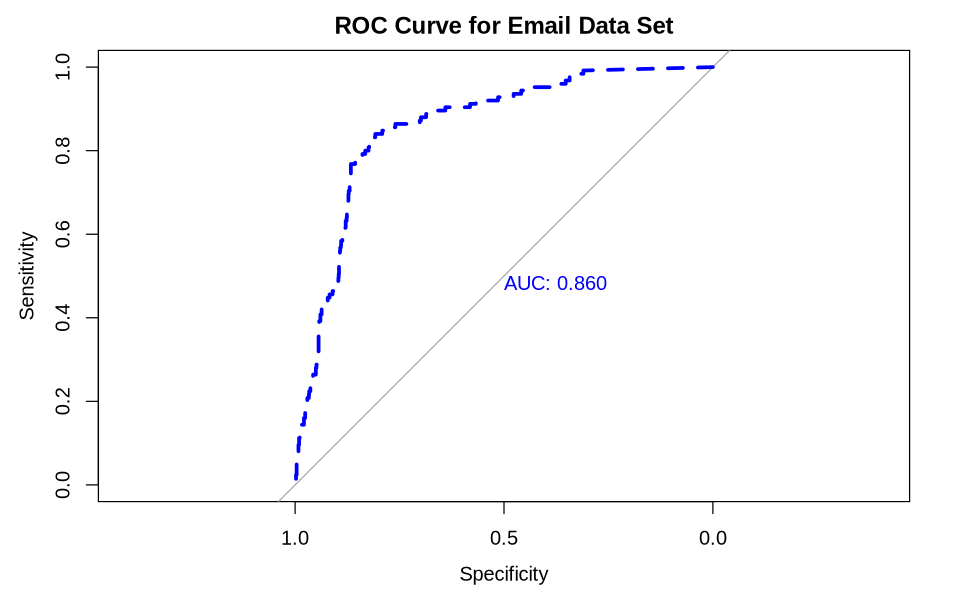

In [18]:
#ROC (Receiver Operating Characteristic) curve for model evaluation 
# Main developer: Emma
# Contributors: 

ROC_log <- roc(
   response = email_test$spam,
   predictor = predict(log_email_model, newdata = email_test, type = "response")
 )
plot(ROC_log,
   print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
   main = "ROC Curve for Email Data Set"
)

# Discussion

## Interpretation & Reflection on the Results

### 1. Summary of Findings & Implications
From the visualizations in the HTML (such as distribution plots, bar graphs of keyword frequencies, or confusion matrices), it’s clear that certain text features and formatting cues strongly differentiate spam from legitimate emails. For instance:
- **Keyword Frequency Plots** (e.g., “money,” “buy,” “urgent”): These consistently appeared at higher rates in spam emails, reinforcing that certain terms are strong spam indicators.
- **Punctuation Usage Charts** (e.g., exclamation marks, excessive capitalization): These highlight how formatting quirks correlate with spam, reflecting that spammers often use attention-grabbing cues.
- **Model Performance Figures** (e.g., ROC curves, accuracy/precision bars): These confirm that the final model, after feature selection, achieves robust classification performance, suggesting that the subset of chosen variables is effective in separating spam from non-spam.

### 2. Expectations vs. Actual Outcomes
- **Expected Alignment**: Many key spam signals (high-importance keywords, suspicious punctuation) match well-known spam-detection patterns and prior research.  
- **Potential Surprises**: Some less intuitive indicators—like certain bigrams or numeric character counts—may show significant predictive power. The visual summaries might reveal unexpectedly high weighting on these features, highlighting the value of data-driven analyses.

### 3. Potential Model Improvements
1. **Balancing Classes**: If spam vs. non-spam remains imbalanced, advanced sampling methods (e.g., SMOTE) or weighting strategies can refine performance (particularly recall).  
2. **Incorporating Contextual Cues**: Future work might combine advanced NLP techniques (e.g., embeddings) to capture phrase-level or context-based signals—potentially visible in more sophisticated visual diagnostics (e.g., word-cloud comparisons).  
3. **Evaluating Over Time**: If any time-series plots indicate evolving spam tactics, a periodic re-training or real-time learning approach could capture shifting spam trends.

### 4. Future Questions & Research Directions
- **Scalability & Transferability**: Testing these findings on different datasets or real-world email streams would confirm whether the insights scale beyond the current sample.  
- **Adaptive Spam Detection**: The images may show certain patterns changing over time, suggesting that an adaptive model, periodically updated with new data, might stay ahead of evolving spam tactics.  
- **Automated Feature Extraction**: Further exploration using transformers or deep learning could automatically discover features not immediately obvious in standard text-based metrics.

Overall, the study’s results show that certain content-based features help detect spam well. These features include suspicious words and unusual formatting. Both the data and visual summaries support this finding. Good feature selection matters for the model’s accuracy. Regularly checking visuals also helps improve and test the model.

# References 
APA 7th edition

1. Diez, D. (2012). email [Dataset]. OpenIntro. https://www.openintro.org/data/index.php?data=email
2. Malicious spam emails developments and authorship attribution. (2013, November 1). IEEE Conference Publication | IEEE Xplore. https://ieeexplore.ieee.org/abstract/document/6754642
3. Soni, Ankit N., (2019, May). Spam e-mail detection using advanced deep convolution neural network algorithms. Journal For Innovative Development In Pharmaceutical And Technical Science. 2, 74. https://jidps.com/wp-content/uploads/2019/05/Spam-e-mail-detection-using-advanced-deep-convolution-neural-network-algorithms.pdf 
